## <div style="direction:rtl"> اضافه کردن کتابخانه های مورد نیاز </div>

In [ ]:
import numpy as np
from random import seed
from random import randrange
from random import random, shuffle, sample
from csv import reader
from math import exp
import matplotlib.pyplot as plt

## <div style="direction:rtl"> تابعی برای خواندن داده ها </div>

In [ ]:
# Load a CSV file
def load_data(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            for col in range(len(row)):
                row[col] = float(row[col].strip())
            dataset.append(row)
    return dataset

## <div style="direction:rtl"> تعریف اکتیویت فانکشن ها </div>

In [ ]:
def relu(x,a=1e-3):
    x = np.array(x)
    s1 = x > 0
    s2 = x < 0
    return (1)*np.multiply(x,s1)+(a)*np.multiply(x,s2)

def d_relu(x,a=1e-3):
    x = np.array(x)
    s1 = x > 0
    s2 = x < 0
    return (1)*s1 + s2*(a)

def tanh(x):
    x = np.array(x)
    return np.tanh(x)

def d_tanh(x):
    x = np.array(x)
    return 1 - np.tanh(x)**2

def sigm(x):
    x = np.array(x)
    return 1 / (1 + np.exp(-x))

def d_sigm(x):
    return 1 - sigm(x)

def linear(x):
    return x

def d_linear(x):
    return 1

## <div style="direction:rtl"> تابع forward propagation </div>
### <div style="direction:rtl"> ورودی های این تابع  </div>
<div style="direction:rtl">  <b> X: </b> داده ها به صورت یک ماتریس n*m می‌باشد (n ابعاد داده های ورودی و m تعداد آن می‌باشد) </div>
<div style="direction:rtl">  <b> Wi: </b> وزن لایه i ام </div>
<div style="direction:rtl">  <b> bi: </b> بایاس لایه ی i ام </div>

### <div style="direction:rtl"> خروجی های این تابع  </div>
<div style="direction:rtl">  <b> A4: </b> خروجی لایه آخر شبکه </div>
<div style="direction:rtl">  <b> DATA: </b> داده های خروجی هر لایه (قبل و بعد از اعمال activate function) </div>

In [ ]:
def forward_propagation(X, W1, W2, W3, W4, b1, b2, b3, b4):
  
    Z1 = np.dot(W1, X) + b1
    A1 = linear(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = relu(Z3)
    Z4 = np.dot(W4, A3) + b4
    A4 = linear(Z4)
      
    # the DATA is the data of previous iteration
    # This will be used for backpropagation
    DATA = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2,
             "Z3": Z3,
             "A3": A3,
             "Z4": Z4,
             "A4": A4
            }
      
    return A4, DATA


## <div style="direction:rtl"> تابع محاسبه ی هزینه </div>
### <div style="direction:rtl"> ورودی های این تابع  </div>
<div style="direction:rtl">  <b> A4: </b> خروجی لایه ی آخر شبکه  </div>
<div style="direction:rtl">  <b> Y: </b> خروجی های اصلی </div>

### <div style="direction:rtl"> خروجی های این تابع  </div>
<div style="direction:rtl">  <b> cost: </b> هزینه ی شبکه که با استفاده از MSE بدست آمده است </div>

In [5]:
def compute_cost(A4, Y):
  
    m = Y.shape[1]
    
    cost = 1/m*np.sum(np.multiply(Y-A4,Y-A4))

    return cost
    

## <div style="direction:rtl"> تابع backward propagation </div>
### <div style="direction:rtl"> ورودی های این تابع  </div>
<div style="direction:rtl">  <b> X,Y: </b> داده های آموزش و خروجی آنها </div>
<div style="direction:rtl">  <b> Wi: </b> وزن لایه i ام </div>
<div style="direction:rtl">  <b> bi: </b> بایاس لایه ی i ام </div>
<div style="direction:rtl">  <b> DATA: </b> داده های خروجی هر لایه (قبل و بعد از اعمال activate function در تابع فوروارد پروپگیشن) </div>
<div style="direction:rtl">  <b> lr: </b> مقدار learning rate </div>

### <div style="direction:rtl"> خروجی های این تابع  </div>
<div style="direction:rtl">  <b> Wi: </b> وزن آپدیت شده ی لایه i ام </div>
<div style="direction:rtl">  <b> bi: </b> بایاس آپدیت شده ی لایه ی i ام </div>


In [69]:
def backward_propagation(W1, b1, W2, b2, W3, b3, W4, b4, DATA, X, Y, lr=0.05):

    m = X.shape[1]
    learning_rate = lr

    # Retrieve from dictionary "DATA"
    A1 = DATA['A1']
    A2 = DATA['A2']
    A3 = DATA['A3']
    A4 = DATA['A4']
    
    Z1 = DATA['Z1']
    Z2 = DATA['Z2']
    Z3 = DATA['Z3']
    Z4 = DATA['Z4']
  
    # Backward propagation: calculate dW1, db1, dW2, db2, dW3, db3, dW4, db4. 
    dZ4 = -2*(Y-A4)
    dW4 = (1 / m) * np.dot(dZ4, A3.T)  # 1*2
    db4 = (1 / m) * np.sum(dZ4, axis = 1, keepdims = True)
  
    dZ3 = np.multiply(np.dot(W4.T, dZ4), d_relu(Z3))
    dW3 = (1 / m) * np.dot(dZ3, A2.T)
    db3 = (1 / m) * np.sum(dZ3, axis = 1, keepdims = True)
    
    dZ2 = np.multiply(np.dot(W3.T, dZ3), d_relu(Z2))
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True)
    
    dZ1 = np.multiply(np.dot(W2.T, dZ2), d_linear(Z1))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True)
      
    # Updating the parameters according to algorithm
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    W4 = W4 - learning_rate * dW4
    b4 = b4 - learning_rate * db4
    # print("dw1 " , dW1," w1 ",W1)
  
    return W1, W2, W3, W4, b1, b2, b3, b4

## <div style="direction:rtl"> خواندن داده های train از ورودی </div>

In [129]:
# load and prepare data

#filename = '(2x1)-(x2+x3).txt'
#filename = '(2x1)+(x2-x3-x4).txt'
filename = '(4x1)-(-1x2-x3-x4).txt'
#filename = '(4x1)+(6x2-x3-x4+2x5).txt'

dataset = np.array(load_data(filename))

X = np.array(dataset[:,0:-1]).T
Y = np.reshape(np.array(dataset[:,-1]),(1,X.shape[1]))

#np.savetxt(filename, dataset, delimiter=",")

## <div style="direction:rtl"> دادن مقدار اولیه به پارامتر ها </div>

In [130]:
n_no = [X.shape[0], 10, 20, 5, Y.shape[0]]

W1 = np.random.randn(n_no[1], n_no[0]) / np.sqrt(n_no[0])
b1 = np.zeros(shape =(n_no[1], 1))

W2 = np.random.randn(n_no[2], n_no[1]) / np.sqrt(n_no[1])
b2 = np.zeros(shape =(n_no[2], 1))

W3 = np.random.randn(n_no[3], n_no[2]) / np.sqrt(n_no[2])
b3 = np.zeros(shape =(n_no[3], 1))

W4 = np.random.randn(n_no[4], n_no[3]) / np.sqrt(n_no[3])
b4 = np.zeros(shape =(n_no[4], 1))


#print(W1,W2,W3,W4)

## <div style="direction:rtl"> آموزش شبکه </div>
<div style="direction:rtl"> در هر بار iteration یکبار forward propagation انجام میشود و سپس با توجه به مقادیر بدست آمده، وزن ها و بایاس ها آپدیت میشونند </div>

In [131]:
num_iterations = 1000
print_cost = True
all_costs = np.zeros(num_iterations)

m = X.shape[1]

for i in range(0 , num_iterations):
    
    # Forward propagation. Inputs: "X, parameters". return: "A4, DATA".
    A4, DATA = forward_propagation(X, W1, W2, W3, W4, b1, b2, b3, b4)

    # Cost function. Inputs: "A4, Y". Outputs: "cost".
    cost = compute_cost(A4, Y)
    all_costs[i] = cost

    # Backpropagation. Inputs: "parameters, DATA, X, Y". Outputs: "grads".
    W1, W2, W3, W4, b1, b2, b3, b4 = backward_propagation(W1, b1, W2, b2, W3, b3, W4, b4, DATA, X, Y,0.01)

    # Print the cost every 1000 iterations
    if print_cost and i % 100 == 0:
        print ("Cost after iteration % i: % f" % (i, cost))
        
    

Cost after iteration  0:  23.656864
Cost after iteration  100:  0.066593
Cost after iteration  200:  0.031315
Cost after iteration  300:  0.021729
Cost after iteration  400:  0.017325
Cost after iteration  500:  0.014648
Cost after iteration  600:  0.012738
Cost after iteration  700:  0.011244
Cost after iteration  800:  0.010008
Cost after iteration  900:  0.008967


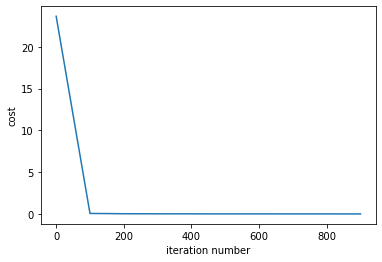

In [132]:
# x axis values
itr = np.array([i  for i in range(num_iterations)])

x = [itr[i] for i in range(0, len(itr), 100)]
y = [all_costs[i] for i in range(0, len(all_costs), 100)]    
    
# plotting the points 
plt.plot(x, y)
  
# naming the x axis
plt.xlabel('iteration number')
# naming the y axis
plt.ylabel('cost')

# function to show the plot
plt.show()

## <div style="direction:rtl"> آماده کردن داده های تست و حساب کردن میانگین خطا </div>

In [121]:
# load data test dataset

test_filename = 'test_(4x1)-(-1x2-x3-x4).txt'


test_dataset = np.array(load_data(filename))

tX = np.array(dataset[:,0:-1]).T
tY = np.reshape(np.array(dataset[:,-1]),(1,X.shape[1]))

#np.savetxt(filename, dataset, delimiter=",")

In [122]:
test_A4, DATA = forward_propagation(tX, W1, W2, W3, W4, b1, b2, b3, b4)

In [124]:
np.mean(compute_cost(test_A4,tY))

0.003095032133389002

## <div style="direction:rtl"> ساخت داده های تست و آموزش جدید </div>

In [114]:
def compute_in(X):
    Y = np.zeros((1,X.shape[1]))
    for i in range(X.shape[1]):
        Y[0,i] = 2*X[0,i]-(X[1,i]+X[2,i])
        #Y[0,i] = (2*X[0,i])+(X[1,i]-X[2,i]-X[3,i])
        #Y[0,i] = (4*X[0,i])-(-1*X[1,i]-X[2,i]-X[3,i])
    return Y

dataset = np.array(np.zeros(shape = (10000,5)))
filename = 'test_(4x1)-(-1x2-x3-x4).txt'



for i in range(10000):
    X = np.random.randn(4,1)
    Y = compute_in(X).T
    dataset[i,0:-1] = X.T
    dataset[i,-1] = Y[0,0]
    
np.savetxt(filename, dataset, delimiter=",")
    